In [1]:
import cv2
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from keras.backend import shape
from keras.layers import Input, Dense
from keras.models import Model

In [2]:
hoda = scipy.io.loadmat('/content/Data_hoda_full.mat')

In [3]:
print(type(hoda))

<class 'dict'>


In [4]:
print(hoda.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Data', 'labels'])


In [5]:
print(hoda['Data'].shape)

(60000, 1)


In [6]:
train_images = hoda['Data'].reshape(-1)
print(train_images.shape)

(60000,)


In [7]:
train_labels = hoda['labels'].reshape(-1)
print(train_labels.shape)

(60000,)


In [8]:
for i in range(5):
    print(train_images[i].shape)

(27, 20)
(20, 21)
(10, 15)
(36, 17)
(36, 28)


In [9]:
dataset = []
for indx, image in enumerate(train_images):
  dataset.append(cv2.resize(image, (28, 28)))

In [10]:
for i in range(5):
    print(dataset[i].shape)

(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


In [11]:
dataset = np.reshape(dataset, (60000, 784))
dataset = dataset.astype('float32')/255

In [12]:
def plot(*data):
  n = 10
  plt.figure(figsize=(20, 4))
  num = len(data)
  for i in range(n):
    # display original
    ax = plt.subplot(num, n, i+1)
    plt.imshow(data[0][i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction or noisy 
    ax = plt.subplot(num, n, i+1+n)
    plt.imshow(data[1][i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    if num == 3:
      # display reconstruction or noisy 
      ax = plt.subplot(num, n, i+1+(2*n))
      plt.imshow(data[2][i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)


  plt.show()

# Simple Autoencoder 

In [13]:
encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

In [14]:
# the encoder model
encoder = Model(input_img, encoded)

In [15]:
# the decoder model
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1](encoded_input)
decoder = Model(encoded_input, decoder_layer)

In [16]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [17]:
autoencoder.fit(dataset, dataset, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 6s 4ms/step - loss: 0.3315
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2143
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1937
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1859
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1826
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1803
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1784
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1770
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1760
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1752


In [18]:
encoded_imgs = encoder.predict(dataset)
decoded_imgs = decoder.predict(encoded_imgs)

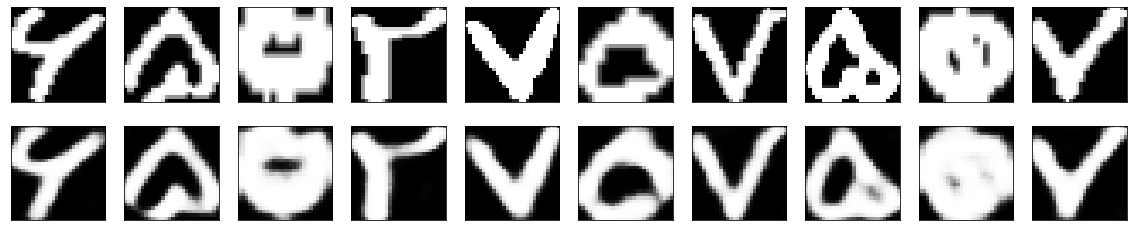

In [19]:
plot(dataset, decoded_imgs)

# Multilayer Autoencoder

In [20]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
multilayer_ae = Model(input_img, decoded)

In [21]:
multilayer_ae.compile(optimizer='adam', loss='binary_crossentropy')

In [22]:
multilayer_ae.fit(dataset, dataset, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.3134
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2177
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2005
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1912
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1853
Epoch 6/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1809
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1773
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1745
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1720
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1701


In [23]:
autoencoder_imgs = multilayer_ae.predict(dataset)

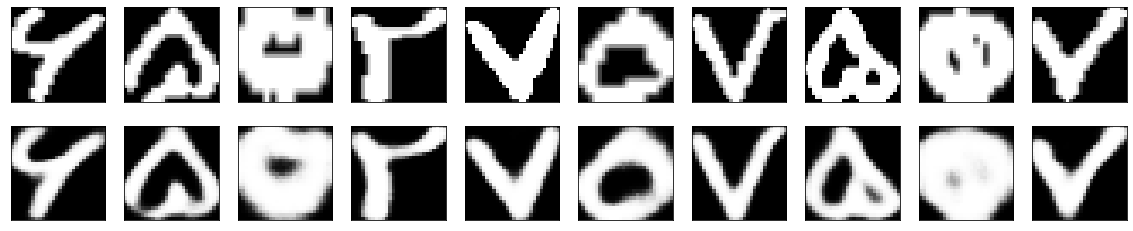

In [24]:
plot(dataset, autoencoder_imgs)

# Denoising Autoencoder

In [25]:
noise = np.random.normal(loc=0.5, scale=0.5, size=dataset.shape)
dataset_noisy = dataset + noise

In [26]:
ae_noisy = Model(input_img, decoded)

In [27]:
ae_noisy.compile(optimizer='adam', loss='binary_crossentropy')

In [28]:
ae_noisy.fit(dataset_noisy, dataset, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2298
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2075
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2034
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2011
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1996
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1983
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1972
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1962
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1954
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1947


In [29]:
noisy_imgs = ae_noisy.predict(dataset_noisy)

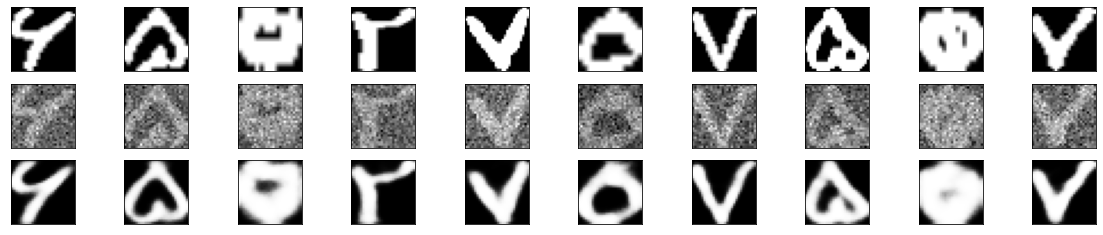

In [30]:
plot(dataset, dataset_noisy, noisy_imgs)

# Sparsity Autoencoder

In [31]:
from keras import regularizers

In [32]:
encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.L1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
sparsity_ae = Model(input_img, decoded)

In [33]:
# the encoder model
encoder = Model(input_img, encoded)

In [34]:
# the decoder model
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1](encoded_input)
decoder = Model(encoded_input, decoder_layer)

In [35]:
sparsity_ae.compile(optimizer='adam', loss='binary_crossentropy')

In [36]:
sparsity_ae.fit(dataset, dataset, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 3s 4ms/step - loss: 0.3466
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2322
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2141
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2060
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2015
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1981
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1955
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1935
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1920
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1908


In [37]:
encoded_ae = encoder.predict(dataset)
decoded_ae = decoder.predict(encoded_ae)

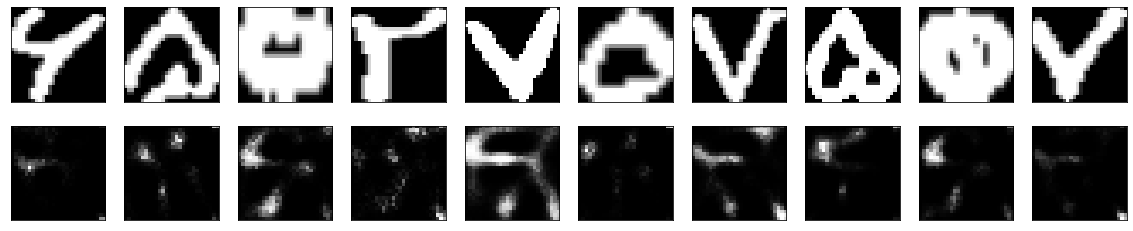

In [38]:
plot(dataset, decoded_ae)